In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Identify price change rate of a stock

## download the stock data

In [4]:
%wget https://drive.google.com/uc?id=1TtMtALjxQk44xv5VdH3ZBxBNzshuzclg -O stocks_1y.csv

UsageError: Line magic function `%wget` not found.


In [12]:
# YOUR INPUT PARAMETER - stock_no is based on the number 8th in your student ID
stock_no = 2

# Read and prepare the stock data, use this variable for 1.1-1.3
#       stock_data - 1-D numpy array of your assigned stock data
#       stock_name - the name of the stock
s = pd.read_csv("stocks_1y.csv")
stock_data = s.iloc[:,stock_no+1].to_numpy()
stock_name = s.columns.values[stock_no+1]
print("Total number of stock price in ONE year =",len(stock_data))


Total number of stock price in ONE year = 245


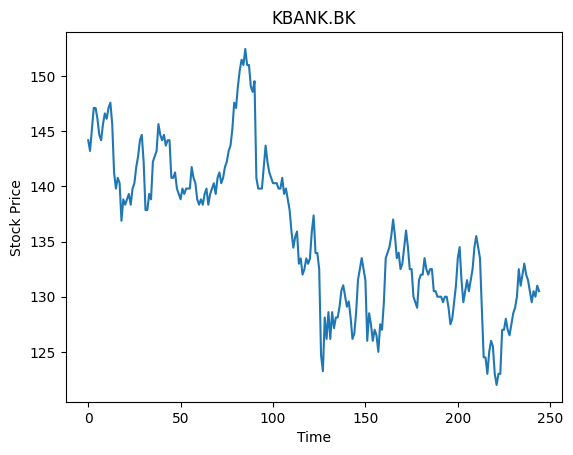

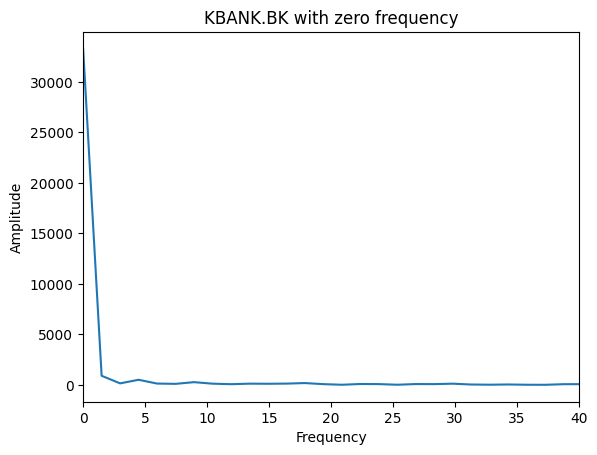

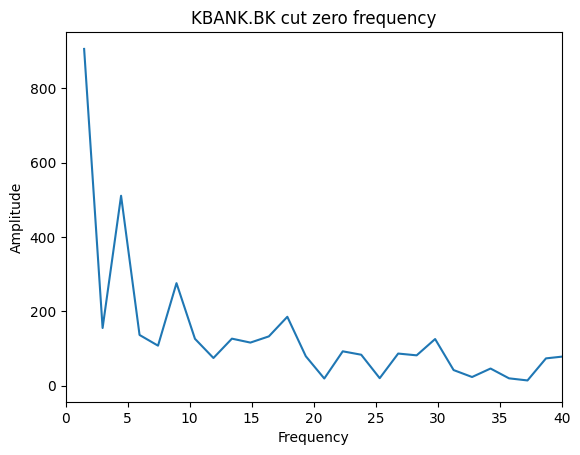

Dominant frequencies are 1.489796 4.469388 8.938776


In [29]:
# TO DO - visualization and find top three dominant frequencies

# YOUR CODE HERE
plt.plot(stock_data)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title(stock_name)
plt.show()



# Compute the dominant frequencies (6 floating points)
stock_fft = np.fft.fft(stock_data)
stock_fft = np.abs(stock_fft)
# freq = np.fft.fftfreq(len(stock_data),1/365)
freq = np.fft.fftfreq(len(stock_data)) * 365



# cut off the negative frequencies
stock_fft = stock_fft[0:int(len(stock_fft)/2)]
freq = freq[0:int(len(freq)/2)]

plt.plot(freq,stock_fft)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title(stock_name+" with zero frequency")
plt.xlim(0,40)
plt.show()

# cut off the zero frequency
stock_fft = stock_fft[1:]
freq = freq[1:]

plt.plot(freq,stock_fft)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title(stock_name+" cut zero frequency")
plt.xlim(0,40)
plt.show()

freq1 = 0.0
freq2 = 0.0
freq3 = 0.0
freq1 = freq[np.argmax(stock_fft)]
stock_fft[np.argmax(stock_fft)] = 0
freq2 = freq[np.argmax(stock_fft)]
stock_fft[np.argmax(stock_fft)] = 0
freq3 = freq[np.argmax(stock_fft)]
stock_fft[np.argmax(stock_fft)] = 0



print("Dominant frequencies are",round(freq1,6),round(freq2,6),round(freq3,6))

#2. Convolution in time domain vs. frequency domain
* Implement the convolution in time domain
* Implement the convolution using DFT
* Compare the computational time used for two methods

In [43]:
import numpy as np
import time
import matplotlib.pyplot as plt


# Generate two random 4000-point sequences of x and h
N = 4000
x = np.random.rand(N)
h = np.random.rand(N)

# To calculate time elapsed for convolution process using start_time and end_time below
start_time = time.time()

# TO DO add convolution process in here
x_conv_t = np.convolve(x,h,mode='full')
end_time = time.time()

t_time = end_time - start_time

start_time = time.time()
x_fft = np.fft.fft(x)
h_fft = np.fft.fft(h)
xh_fft = x_fft * h_fft
x_conv_fft = np.fft.ifft(xh_fft)
end_time = time.time()

f_time = end_time - start_time

# Compute the convolution time (6 floating points)
convolution_time = end_time - start_time
print("Computational Time for Convolution in time Domain:", round(t_time,6), "seconds")
print("Computational Time for Convolution in frequency Domain:", round(f_time,6), "seconds")



Computational Time for Convolution in time Domain: 0.003491 seconds
Computational Time for Convolution in frequency Domain: 0.000991 seconds
[985.38686481 988.41997339 987.39254992 ... 988.80043157 989.67789451
 985.41827667]
[0.64210832 0.73690497 1.02594137 ... 0.97404889 0.83439829 0.38314509]
